In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam

# LOAD DATASET

In [26]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

# NORMALIZE

In [27]:
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

In [28]:
def build_model(dropout_rate):
    model=Sequential([
        Dense(64,activation="relu",input_shape=(x_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32,activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss="mean_squared_error")


    return model

In [29]:
dropout_rates=[0.2,0.5,0.9]
history_dict={}

In [30]:
for rate in dropout_rates:
    print(f"Trainin gusing rate:{rate}")
    model=build_model(rate)
    history=History()
    history_dict[rate]=history
    model.fit(x_train,y_train,epochs=50,validation_split=0.2,verbose=0,callbacks=[history])
      

Trainin gusing rate:0.2


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trainin gusing rate:0.5
Trainin gusing rate:0.9


In [31]:
history_dict.items()

dict_items([(0.2, <keras.src.callbacks.history.History object at 0x0000023E5FAD7860>), (0.5, <keras.src.callbacks.history.History object at 0x0000023E62B257F0>), (0.9, <keras.src.callbacks.history.History object at 0x0000023E5FA7AF90>)])

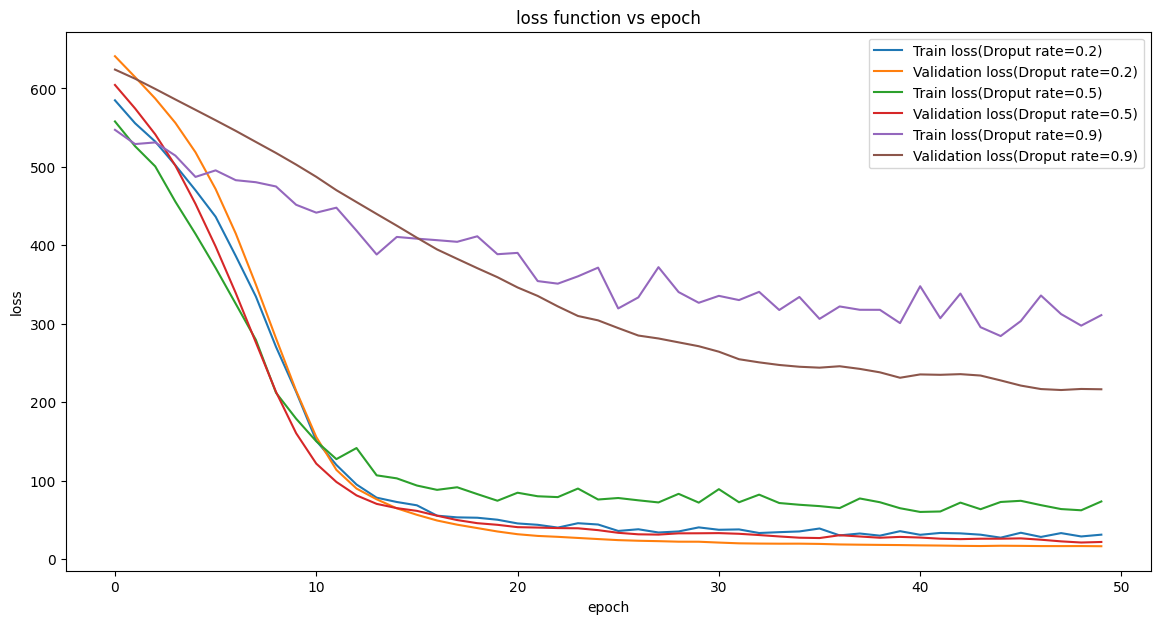

In [32]:
plt.figure(figsize=(14,7))
for rate,history in history_dict.items():
    plt.plot(history.history['loss'],label=f"Train loss(Droput rate={rate})")
    plt.plot(history.history['val_loss'],label=f"Validation loss(Droput rate={rate})")
plt.title("loss function vs epoch")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()